In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Алгоритм 3x + 1

In [2]:
# Функция последовательности от начального значения start
def calc_alg(start, limit=200):
    arr = [start]
    y = start
    count = 0
    while y > 1 and count <= limit:
        y = 3 * y + 1
        arr.append(y)
        count += 1
        while y % 2 == 0 and count <= limit:
            y = y // 2
            arr.append(y)
            count += 1
    return arr

# Усреднение значений линейной регрессией
def lin_alg(y):
    x = np.array(range(len(y))).reshape(-1, 1)
    reg = LinearRegression().fit(x, y)
    return reg.predict(x)

# Использование логарифма и усреднения
def func_alg(start, period=1, limit=200):
    y = np.log(calc_alg(start, limit))
    y1 = y if period <= 1 else ma(y, period)
    y2 = lin_alg(y) if period <= 1 else ma(lin_alg(y), period)
    return np.array(range(len(y2))), y1, y2

# Построение графиков

In [3]:
start = 72101241
#arr_start = np.concatenate((np.array([72101241]), np.random.randint(10000000, 100000000, size=5)))
arr_start = np.array([start - ind for ind in range(6)])
print(f"start = {arr_start}")

start = [72101241 72101240 72101239 72101238 72101237 72101236]


## Исходный тренд

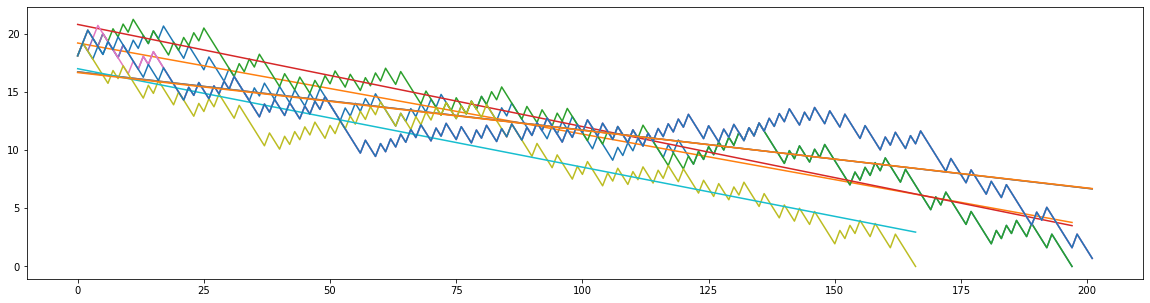

Wall time: 257 ms


In [4]:
%%time
plt.figure(figsize=(20, 5))
for start in arr_start:
    x, y1, y2 = func_alg(start, period=1, limit=200)
    plt.plot(x, y1)
    plt.plot(x, y2)
plt.show()

## Нормализованные графики

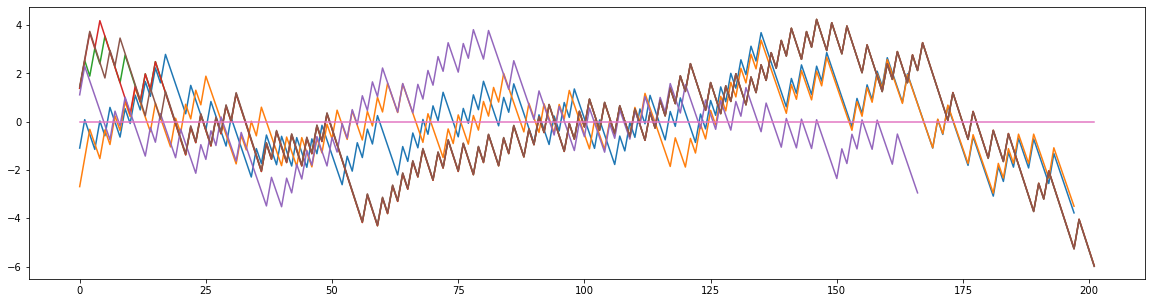

Wall time: 263 ms


In [5]:
%%time
plt.figure(figsize=(20, 5))
for start in arr_start:
    x, y1, y2 = func_alg(start, period=1, limit=200)
    plt.plot(x, y1 - y2)
plt.plot(x, x * 0)
plt.show()

## Усреднение графиков

In [6]:
# Простая скользящая средняя
def ma(arr, period):
    return np.array([arr[ind:ind+period].mean() for ind in range(arr.shape[0] - period + 1)])

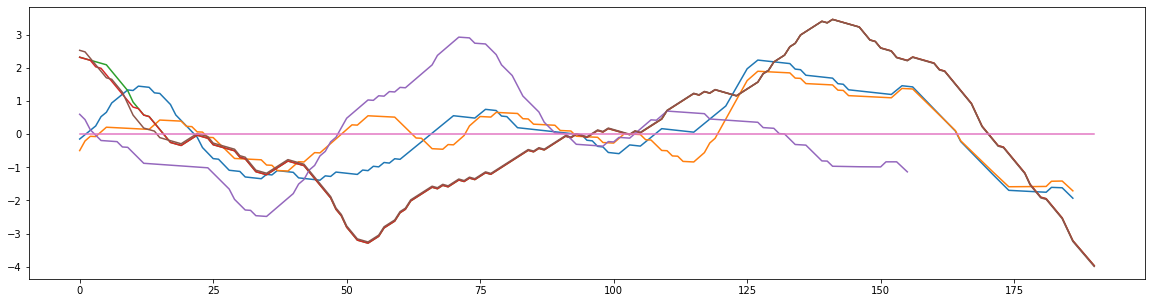

In [7]:
plt.figure(figsize=(20, 5))
for start in arr_start:
    x, y1, y2 = func_alg(start, period=12, limit=200)
    plt.plot(x, y1 - y2)
plt.plot(x, x * 0)
plt.show()

## Растяжение графиков по OX до одного размера

In [8]:
from scipy.interpolate import interp1d

In [9]:
# Растяжение графика до нужного размера по оси OX
def stretch_x(y, num):
    k = (num - 1) / (y.shape[0] - 1)
    xt = {ind: round(k * ind) for ind in range(y.shape[0])}
    y_out = np.zeros((num,)) * np.nan
    y_out[0] = y[0]
    knd = 1
    for ind in range(y.shape[0]-1):
        if xt[ind] == xt[ind+1]:
            y_out[xt[ind]] += y[ind+1]
            knd += 1
        else:
            y_out[xt[ind]] /= knd
            y_out[xt[ind+1]] = y[ind+1]
            knd = 1
    y_out[xt[y.shape[0]-1]] /= knd
    return y_out

# Растяжение и интерполяция графика
def interp(y, num):
    y_out = stretch_x(y, num)
    x_out = np.arange(y_out.shape[0])
    idx = ~np.isnan(y_out)
    f = interp1d(x_out[idx], y_out[idx], kind='linear')
    return f(x_out)

In [10]:
arr_start

array([72101241, 72101240, 72101239, 72101238, 72101237, 72101236])

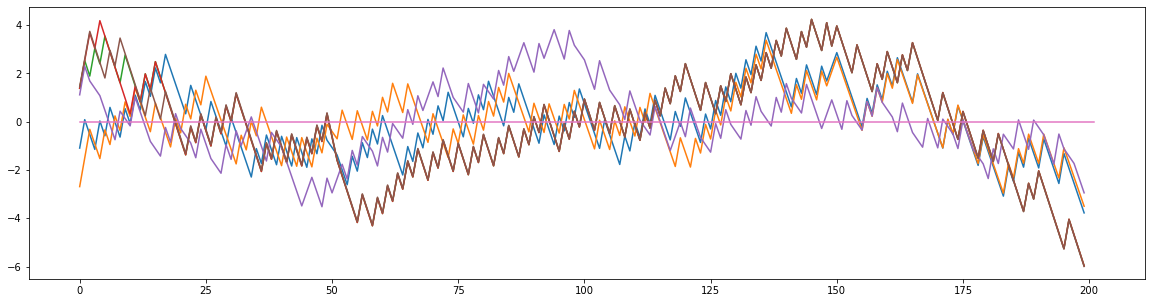

Wall time: 212 ms


In [11]:
%%time
plt.figure(figsize=(20, 5))
for start in arr_start:
    x, y1, y2 = func_alg(start, period=1, limit=200)
    y_out = interp(y1 - y2, 200)
    x_out = np.arange(y_out.shape[0])
    plt.plot(x_out, y_out)
plt.plot(x, x * 0)
plt.show()

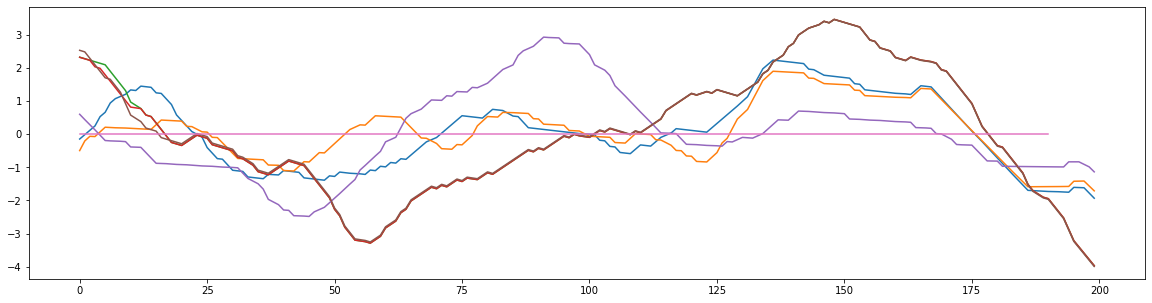

In [12]:
plt.figure(figsize=(20, 5))
for start in arr_start:
    x, y1, y2 = func_alg(start, period=12, limit=200)
    y_out = interp(y1 - y2, 200)
    x_out = np.arange(y_out.shape[0])
    plt.plot(x_out, y_out)
plt.plot(x, x * 0)
plt.show()